In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = [10, 10]

% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
ABSOLUTE_PATH = '.'
DATA_FOLDER = ABSOLUTE_PATH + f'/../../data/g1-piek/scenario1/'
INPUT_FOLDER = DATA_FOLDER + f'automatic_evaluations/'
OUTPUT_FOLDER = DATA_FOLDER + f'plots/'

STATS_FILES = [
    'g1s1.csv',
    # '2021-12-07-16_26_14_turns83_thomas.csv',
    # '2021-12-07-16-26-14_truns83_imme.csv',
    # '2021-12-07-16-26-14_turns83_fina.csv'
]

file = STATS_FILES[0]

### Read data

In [6]:
df = pd.read_csv(INPUT_FOLDER + file, header=0)
df = df.set_index('Turn')

In [7]:
print(f'{len(df)} turns')
df.head()

83 turns


,System llh,MLM llh,USR DLcontext,USR DLfact,Overall Human Rating,Interesting,Engaging,Specific,Relevant,Correct,...,Total role assertions,Total general concept inclusions,Total domain axioms,Total range axioms,Total role inclusions,Total axioms,Total aBox axioms,Total tBox axioms,Total semantic statements,Total sources
Turn,,,,,,,,,,,,,,,,,,,,,
0.0,0.290093,0.562575,0.616137,0.801052,5.000000,5.000000,5.0,5.0,5.000000,5.000000,...,456.0,644.0,65.0,64.0,234.0,2769.0,1762.0,1007.0,0.0,0.0
1.0,0.000000,0.100155,0.910139,0.774431,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,644.0,65.0,64.0,234.0,2769.0,1762.0,1007.0,0.0,0.0
2.0,0.312401,0.694319,0.997722,0.719742,5.000000,5.000000,5.0,5.0,5.000000,5.000000,...,456.0,644.0,65.0,64.0,234.0,2769.0,1762.0,1007.0,0.0,0.0
3.0,0.000000,0.082555,0.983849,0.735612,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,644.0,65.0,64.0,234.0,2840.0,1833.0,1007.0,0.0,0.0
4.0,0.547160,0.736176,0.969341,0.739177,4.666667,3.333333,4.0,4.0,4.333333,4.666667,...,481.0,644.0,65.0,64.0,234.0,2840.0,1833.0,1007.0,0.0,0.0


In [8]:
df.columns

Index(['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact',
       'Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
       'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable',
       'Fluent', 'Total nodes', 'Total edges', 'Average degree',
       'Average degree centrality', 'Average closeness',
       'Average degree connectivity', 'Average assortativity',
       'Average node connectivity', 'Number of components',
       'Number of strong components', 'Centrality entropy',
       'Closeness entropy', 'Sparseness', 'Total explicit triples',
       'Total classes', 'Total properties', 'Total instances',
       'Total object properties', 'Total data properties',
       'Total equivalent class properties', 'Total subclass properties',
       'Total entities', 'Total inverse entities',
       'Ratio of inverse relations', 'Property class ratio',
       'Average population', 'Class property ratio', 'Attribute richness',
       'Inheritance richness', 'Rela

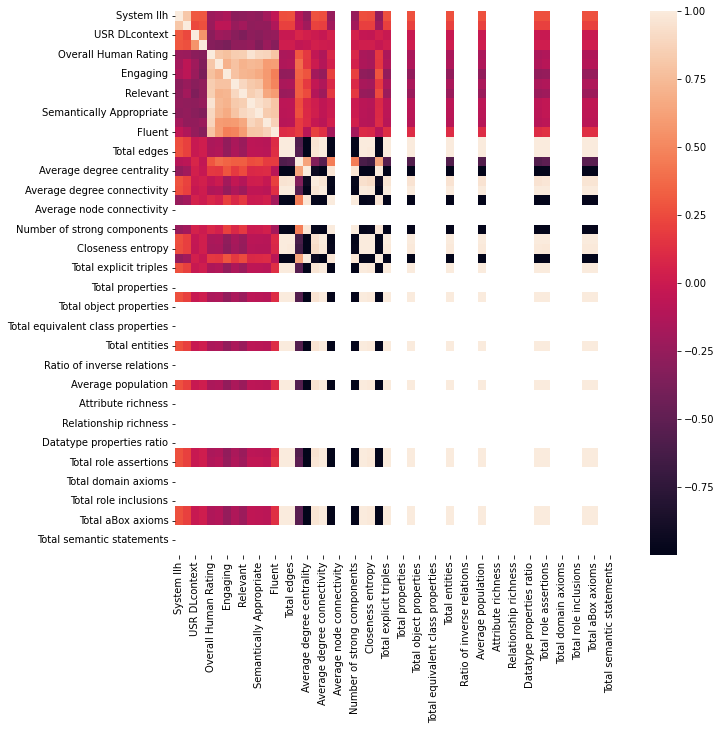

In [9]:
corr_df = df.corr(method ='pearson')
g = sns.heatmap(corr_df)

g.figure.savefig(OUTPUT_FOLDER +f"Correlation heatmap.png", dpi=300)

## Plots

In [10]:
# # Separate information so it can be comparable
# df_conflicts = df[['cardinality conflicts', 'negation conflicts']]
# df_gaps = df[['subject gaps', 'object gaps']]
# df_novelty = df[['statement novelty']]
# df_novelties = df[['subject novelty', 'object novelty']]
# df_overlaps = df[['overlaps subject-predicate', 'overlaps on predicate-object']]
# df_trust = df['trust']

df_automatic = ('Automatic metrics', df[['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact']])
df_human = ('Human metrics', df[['Overall Human Rating', 'Interesting', 'Engaging', 'Specific', 'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable', 'Fluent']])

df_graph = ('Graph metrics',
            df[[ 'Average degree centrality', 'Average closeness',
       'Average degree connectivity', 'Average assortativity',
       'Average node connectivity', 'Number of components',
       'Number of strong components', 'Centrality entropy',
       'Closeness entropy', 'Sparseness', ]])
df_graph_size = ('Graph size', df[['Total nodes', 'Total edges']])
df_degree = ('Graph degree', df[['Average degree']])

df_onto_size = ('RDF graph size', df['Total explicit triples'])
df_ontology = ('Ontology size', df[['Total classes', 'Total properties']])

df_brain = ('Brain', df[['Total semantic statements', 'Total sources']])



In [11]:

# dfs = [df_conflicts, df_gaps, df_novelty, df_novelties, df_overlaps, df_trust, df_size, df_brain, df_ontology]
dfs = [
    df_automatic,
    df_human, 
       df_graph,
       df_graph_size, 
    df_degree, 
    df_onto_size,
       df_brain, 
    df_ontology
]

In [12]:
def plot_progression(df_to_plot, name):
    df_to_plot = df_to_plot.reset_index().melt('Turn', var_name='cols', value_name='vals')
    g = sns.catplot(x="Turn", y="vals", hue='cols', data=df_to_plot, kind='point')
    
    ax = plt.gca()
    plt.xticks(ax.get_xticks()[::5], rotation="045") 
    
    g.figure.savefig(OUTPUT_FOLDER +f"{name}.png", dpi=300)


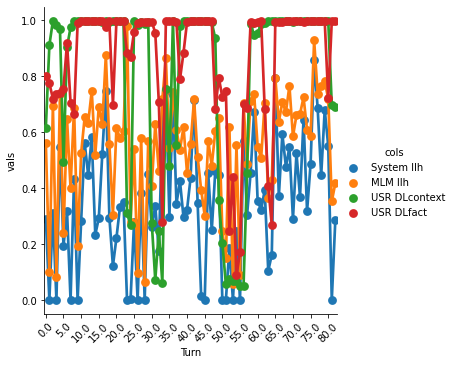

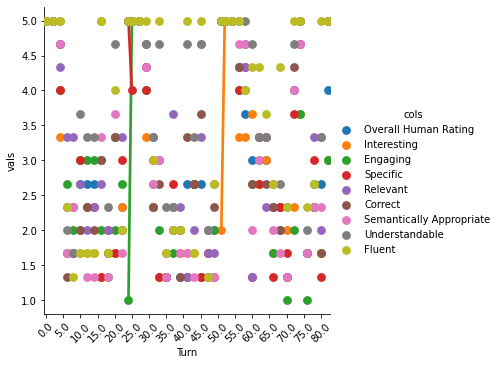

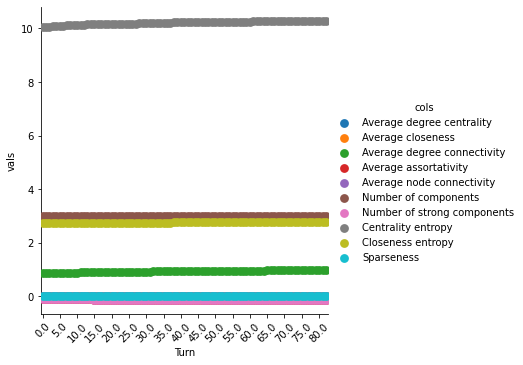

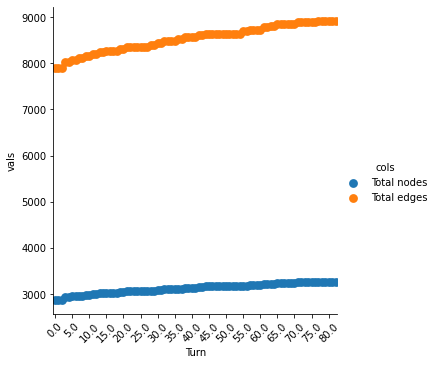

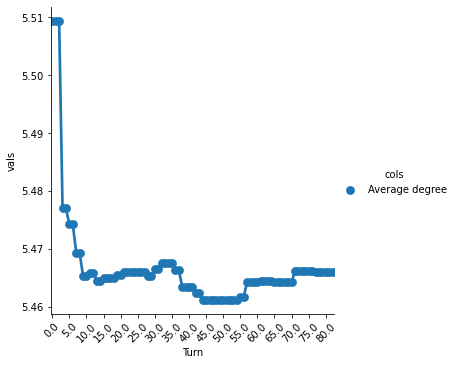

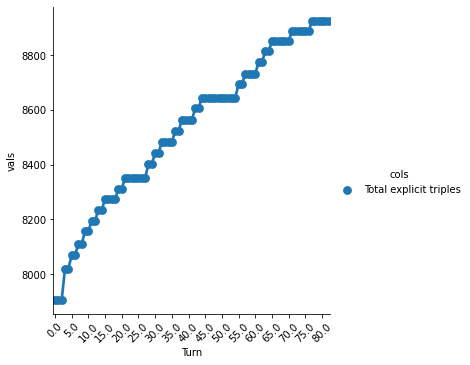

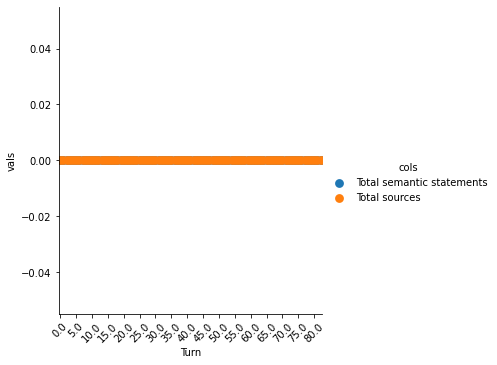

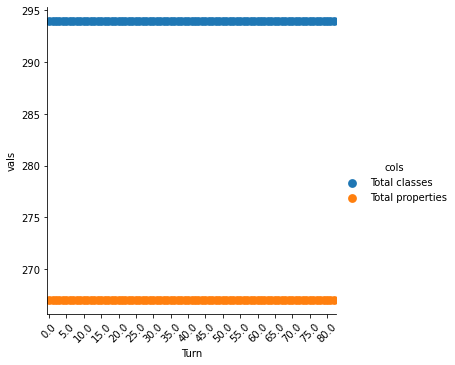

In [13]:
for (name, el) in dfs:
    plot_progression(el, name)